# 7 社交网络信息传播

社交网络信息传播的特性:

* 爆发性: 突然很多.

* 二次传播: 主流媒体和博客的传播有 2.5 小时时差.

可以用扩散率 (转发率): 转发信息的人数 / 看到信息的人数 量化.

## 羊群效应

* Milgram 实验: 让大街上 5 个人抬头看天, 则 20% 的人都会看天. 让 18 人看天, 则 50% 的人都会看天.

* 取球猜色实验 (Anderson & Holt 1996): 一个容器里装有三个球, 有两种颜色: 红色和蓝色. 让每个学生摸一个球, 猜测容器里红色多还是蓝色多, 并将猜测写在黑板上. 每个学生能看到先前学生在黑板上的猜测. 实验结果: 即使容器里有两个红的一个蓝的, 如果前两个学生恰巧摸(猜)的是蓝色, 则后面猜测蓝色的占多数.



### 贝叶斯解释

对于取球猜色实验, 可以认为此后的学生们也将之前已有的观测纳入考量. 例如假设容器内有两红一蓝, 一开始两位同学拿到蓝球, 则第三位同学即使拿到红球也会因为 2:1 的关系认为蓝球多而作出猜测. 于是此后的学生们可能都认为蓝球多.


### 沉默的螺旋 

沉默的螺旋 (Elisabeth Noelle-Neumann 1974): 一方意见由于趋同, 声音越来越大; 另一方意见则趋于沉默. 需要在"沉默"的人群中有意见领袖打破这个效应. 例如皇帝的新衣.

## 信息级联

在社交网络中, 信息在相邻的节点之间传输. 信息到达新的节点后又向着新的相邻的节点传播, 如此扩散. (例如信息传播、病毒传播) 

### 独立级联模型 (ICM)

图中的每个节点分为活跃与不活跃两类. $t$ 时间活跃的节点 $v_i$ 有一定概率 $p_{ij}$ 在 $t+1$ 时间激活 $v_j$. 以此网络被逐渐激活. 

### 线性阈值模型 (LT)

对于每个节点 $v_i$ 其与每个邻居 $v_j$ 之间有权重 $p_{ji}$. 若 $t$ 时间 $\sum_{j\in N(v_i)}p_{ji}\mathbb I_{j激活}\geqslant \theta$ (已经激活的邻居的权重和超过阈值 $\theta$), 则 $t+1$ 时间 $v_i$ 被激活.

### 级联范围最大化

在产品营销等实例中, 需要激活尽量少的节点, 使得最终能激活最多的节点.

## 创新扩散

新事物的扩散即创新扩散. 有 5 个步骤: 

认知 (knowledge), 说服 (persuasion), 决定 (decision), 实施 (implementation), 确认 (confirmation).

受众分为 5 类:

创新者 (innovator), 早期采用者 (early adopter), 早期大众 (early majority), 晚期大众 (late majority), 落后者 (laggard)。


### 创新扩散模型

创新扩散的受众人数随时间的变化函数 $A(t)$ 可用微分方程建模:

$$\frac{\partial A(t)}{\partial t} = (\alpha + \beta A(t))(P - A(t))$$

其中 $\alpha$ 为外部影响力, $\beta$ 为内部影响力. $P$ 为潜在用户数量, 是 $A(t)$ 的上限. 令 $\eta = \dfrac{P - A(0)}{\alpha +\beta A(0)}$, 求解得
$$A(t) = \frac{P - \alpha \eta e^{-(\alpha +\beta P)(t - t_0)}}{1+\beta\eta e^{-(\alpha+\beta P)(t - t_0)}}

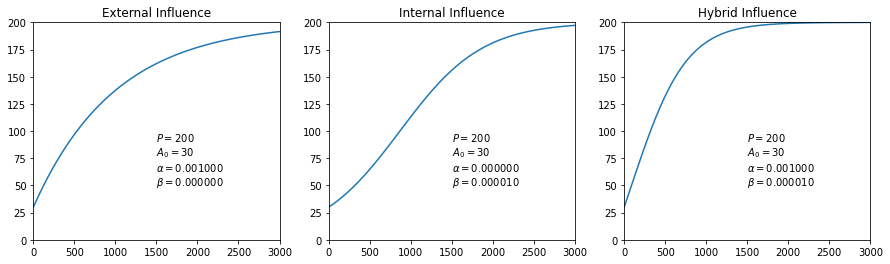

In [32]:
from matplotlib import pyplot as plt
import numpy as np
P = 200
A0 = 30

def Simulate(P, A0, alpha, beta, t):
    """Solve dy/dt = (alpha + beta * y) * (P - y) with y0 = A0"""
    eta = (P - A0) / (alpha + beta * A0)
    expt = np.exp(-(alpha + beta * P) * t)
    y = (P - alpha * eta * expt) / (1 + beta * eta * expt)
    return y

t = np.linspace(0, 3000, 2000)
plt.figure(figsize = (15, 4))
for i, alpha, beta, title in zip(range(3), (1e-3,0,1e-3), (0,1e-5,1e-5), \
        ('External Influence','Internal Influence','Hybrid Influence')):
    plt.subplot(1, 3, i+1)
    plt.plot(t, Simulate(P, A0, alpha, beta, t))
    plt.text(t.mean(), P/4, '$P=%d$\n$A_0=%d$\n$\\alpha=%.6f$\n$\\beta=%.6f$'%(P,A0,alpha,beta))
    plt.ylim(0, P)
    plt.xlim(0, t[-1])
    plt.title(title)
plt.show()

## 流行病模型

对于传染病, 假设有三类人群: 

1. 易感染, 设有 S 人
2. 已感染, 设有 I 人
3. 康复 / 死亡 (不再感染或传染), 设有 R 人

设总人数 S + I + R = N 恒定.

### SI 模型

不考虑 R, 即设 R = 0, 即感染后不能治愈 (如 AIDS).

假设感染人数增加率与易感人群成正比, 比例系数 $\beta$ 称为接触概率:
$$\frac{\partial I}{\partial t}\cdot \frac{1}{I} = \beta S  = \beta (N-I)$$



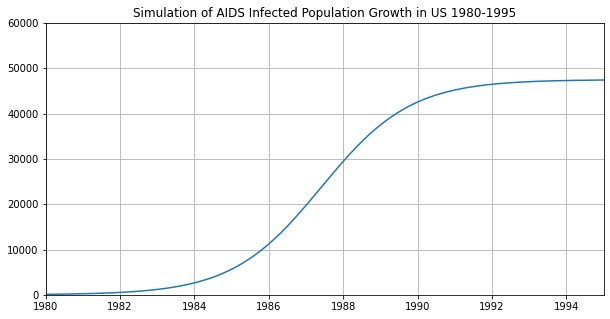

In [48]:
from matplotlib import pyplot as plt
import numpy as np
def Simulate(P, A0, alpha, beta, t):
    """Solve dy/dt = (alpha + beta * y) * (P - y) with y0 = A0"""
    eta = (P - A0) / (alpha + beta * A0)
    expt = np.exp(-(alpha + beta * P) * t)
    y = (P - alpha * eta * expt) / (1 + beta * eta * expt)
    return y
plt.figure(figsize = (10, 5))
t = np.linspace(0, 15, 2000)
plt.plot(1980 + t, Simulate(47500, 100, 0, 1.75e-5, t))
plt.ylim(0, 60000)
plt.xlim(1980, 1995)
plt.grid()
plt.title('Simulation of AIDS Infected Population Growth in US 1980-1995')
plt.show()

### SIR 模型

感染人群 I 有概率 $\gamma$ 康复, 且康复 (变成 R) 后不再感染:

$$\left\{\begin{aligned}&\frac{\partial I}{\partial t}  = \beta IS -\gamma I
\\ & \frac{\partial S}{\partial t} = -\beta IS
\\ & \frac{\partial R}{\partial t} = \gamma I\end{aligned}\right.$$

In [49]:
import numpy as np 
def RK4(f, u, h, n):
    """Solve u' = f(t, u), u(0)=u and return (n+1) steps with interval h by RK4"""
    us = [u if isinstance(u, float) else u.copy()]
    t = 0
    for i in range(n):
        k1 = f(t, u)
        k2 = f(t + h*.5, u + h*.5*k1)
        k3 = f(t + h*.5, u + h*.5*k2)
        k4 = f(t + h, u + h*k3)
        u += h/6 * (k1 + 2*(k2 + k3) + k4)
        t += h 
        us.append(u if isinstance(u, float) else u.copy())

    return np.array(us)

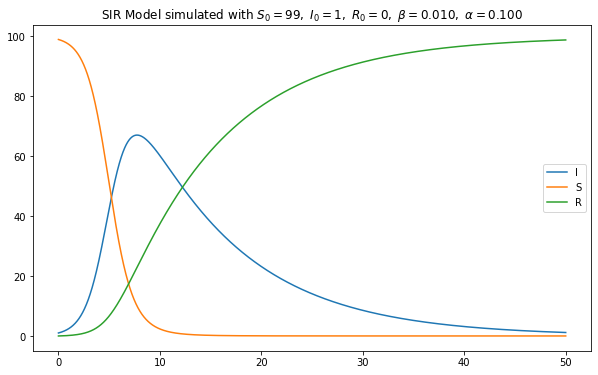

In [74]:
import numpy as np
beta = 1e-2
gamma = 1e-1
h = 5e-3
t = 50
def f_SIR(t, x):
    I, S, R = x
    return np.array([beta * I * S - gamma * I, -beta * I * S, gamma * I])
initial = np.array([1., 99., 0.])
result_SIR = RK4(f_SIR, initial.copy(), h, int(t/h))

from matplotlib import pyplot as plt
plt.figure(figsize = (10, 6))
plt.plot(np.linspace(0, t, result_SIR.shape[0]), result_SIR.T[0])
plt.plot(np.linspace(0, t, result_SIR.shape[0]), result_SIR.T[1])
plt.plot(np.linspace(0, t, result_SIR.shape[0]), result_SIR.T[2])
plt.legend('ISR')
plt.title('SIR Model simulated with $S_0=%.0f,\\ I_0=%.0f,\\ R_0=%.0f,\\ \\beta=%.3f,\\ \\alpha=%.3f$'%
    (initial[1], initial[0], initial[2], beta, gamma))
plt.show()

### SIS 模型

不考虑 R, 即 R = 0, 即假设康复后变成 S 而不是 R. (康复后仍然易感染).

$$\left\{\begin{aligned}&\frac{\partial I}{\partial t}  = \beta IS -\gamma I
\\ & \frac{\partial S}{\partial t} = -\beta IS+\gamma I\end{aligned}\right.$$

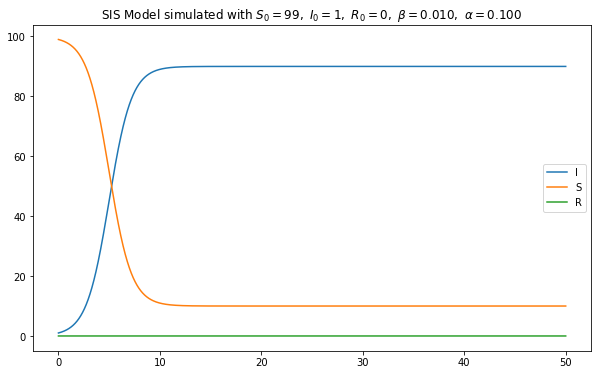

In [75]:
import numpy as np
beta = 1e-2
gamma = 1e-1
h = 5e-3
t = 50
def f_SIS(t, x):
    I, S, R = x
    return np.array([beta * I * S - gamma * I, -beta * I * S + gamma * I, 0.])
initial = np.array([1., 99., 0.])
result_SIS = RK4(f_SIS, initial.copy(), h, int(t/h))

from matplotlib import pyplot as plt
plt.figure(figsize = (10, 6))
plt.plot(np.linspace(0, t, result_SIS.shape[0]), result_SIS.T[0])
plt.plot(np.linspace(0, t, result_SIS.shape[0]), result_SIS.T[1])
plt.plot(np.linspace(0, t, result_SIS.shape[0]), result_SIS.T[2])
plt.legend('ISR')
plt.title('SIS Model simulated with $S_0=%.0f,\\ I_0=%.0f,\\ R_0=%.0f,\\ \\beta=%.3f,\\ \\alpha=%.3f$'%
    (initial[1], initial[0], initial[2], beta, gamma))
plt.show()

### SIRS 模型

康复者 R 有概率 $\lambda$ 变成易感染者 $S$

$$\left\{\begin{aligned}&\frac{\partial I}{\partial t}  = \beta IS -\gamma I
\\ & \frac{\partial S}{\partial t} = -\beta IS+\lambda R
\\ & \frac{\partial R}{\partial t} = \gamma I-\lambda R\end{aligned}\right.$$

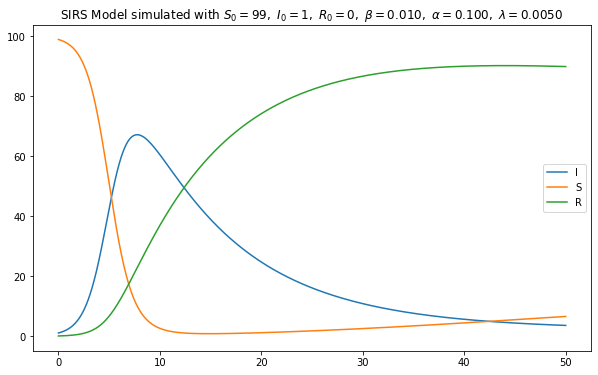

In [79]:
import numpy as np
beta = 1e-2
gamma = 1e-1
lamb = 5e-3
h = 5e-3
t = 50
def f_SIRS(t, x):
    I, S, R = x
    return np.array([beta * I * S - gamma * I, -beta * I * S + lamb * R, gamma * I - lamb * R])
initial = np.array([1., 99., 0.])
result_SIRS = RK4(f_SIRS, initial.copy(), h, int(t/h))

from matplotlib import pyplot as plt
plt.figure(figsize = (10, 6))
plt.plot(np.linspace(0, t, result_SIRS.shape[0]), result_SIRS.T[0])
plt.plot(np.linspace(0, t, result_SIRS.shape[0]), result_SIRS.T[1])
plt.plot(np.linspace(0, t, result_SIRS.shape[0]), result_SIRS.T[2])
plt.legend('ISR')
plt.title('SIRS Model simulated with $S_0=%.0f,\\ I_0=%.0f,\\ R_0=%.0f,\\ \\beta=%.3f,\\ \\alpha=%.3f,\\ \\lambda=%.4f$'%
    (initial[1], initial[0], initial[2], beta, gamma, lamb))
plt.show()